# Schelling Model

This is a primitive model of how "societies" develop based on happiness with their neighbors. Each pixel is assumed to be an occupiable house.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

We first start with the universe we're going to simulate.

In [11]:
# Generate the colormap for our array
# Suppose the city is divided between Kakampink and DDS agents
colors = ["deeppink", "white", "green"] # So it matches Kakampink's shade
cmap2028 = LinearSegmentedColormap.from_list("pink_white_green", colors)

# Random number generator
realtor = np.random.default_rng() # Name of our real estate developer

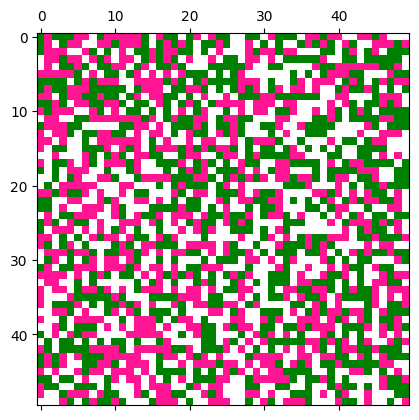

In [11]:


# # introducing tenants
# # build a lattice
# N = 50 # Set this to 50
# city_map = realtor.choice([-1, 0, 1], (N, N), [0.45, 0.1, 0.45]) 
# # where 10% is empty space
# preference_map = plt.matshow(city_map, cmap=cmap2028)
# # plt.colorbar(preference_map); this is rather unnecessary

## Moving Rules

This is the exciting part, both "Kakampink" and "DDS" agents hate each other. As tasked in the DeepNote, we'll give them each a tolerance threshold $p$ of 0.50.

In [12]:
# Define a city_map
N = 50
total = N * N

# exact counts
num_empty = 250
num_agents = total - num_empty
num_neg = num_agents // 2
num_pos = num_agents - num_neg  # handles odd case safely

# build flat array
values = np.array([-1]*num_neg + [1]*num_pos + [0]*num_empty)

# shuffle and reshape
realtor.shuffle(values)
city_map = values.reshape(N, N)
# Define Happiness_Score
# def neighbors(matrix, N, i, j):
#     nw = matrix[(i-1)%N, (j-1)%N]
#     n = matrix[(i-1)%N, j%N]
#     ne= matrix[(i-1)%N, (j+1)%N] # To force indices i and j to be less than 50
#     w = matrix[i%N, (j-1)%N]
#     e = matrix[i%N, (j+1)%N]
#     sw = matrix[(i+1)%N, (j-1)%N]
#     s = matrix[(i+1)%N, j%N]
#     se = matrix[(i+1)%N, (j+1)%N]
#     return [nw, n, ne, w, e, sw, s, se]

# import numpy as np

def compute_happiness(matrix):
    N = matrix.shape[0]

    # Count occupied neighbors
    occupied = (matrix != 0).astype(int)

    total_neighbors = sum(
        np.roll(np.roll(occupied, dx, axis=0), dy, axis=1)
        for dx in [-1, 0, 1]
        for dy in [-1, 0, 1]
        if not (dx == 0 and dy == 0)
    )

    # Count same-type neighbors
    same_neighbors = sum(
        np.roll(np.roll(matrix, dx, axis=0), dy, axis=1) == matrix
        for dx in [-1, 0, 1]
        for dy in [-1, 0, 1]
        if not (dx == 0 and dy == 0)
    )

    # Avoid divide by zero
    happiness = np.zeros_like(matrix, dtype=float)
    mask = (matrix != 0) & (total_neighbors > 0)
    happiness[mask] = same_neighbors[mask] / total_neighbors[mask]

    return happiness
        

In [36]:
print(neighbors(city_map, 0, 0))
happiness(0, 0)

[np.int64(-1), np.int64(0), np.int64(0), np.int64(0), np.int64(-1), np.int64(-1), np.int64(1), np.int64(-1)]


0.125

In our test code, the DDS at the index cell, only has a single neighbor, located in the south who's like her. As such, we're ready to simulate her movement until they manage to find a fellow Karton enthusiast.

In [13]:
# Build an equilibration function
# def equilibrate(p) 
# First build a model counting happy cells
# def count_happy_cells(matrix, N, p): # Full occupation Matrix is our 1
#     happiness = compute_happiness(matrix)
#     occupied = (matrix != 0)
#     happy = (happiness > p) & occupied
#     return happy.sum() / matrix.size
      
# Let's make a final function
def equilibrate(matrix, p, max_steps=1000):

    for step in range(max_steps):
        happiness = compute_happiness(matrix)
        unhappy = np.argwhere((matrix != 0) & (happiness < p))
        empty   = np.argwhere(matrix == 0)

        if len(unhappy) == 0 or len(empty) == 0:
            break

        np.random.shuffle(unhappy)
        np.random.shuffle(empty)

        moves = min(len(unhappy), len(empty))

        for k in range(moves):
            old_x, old_y = unhappy[k]
            new_x, new_y = empty[k]

            matrix[new_x, new_y] = matrix[old_x, old_y]
            matrix[old_x, old_y] = 0

    return matrix


We have defined all our functions now it's time to plot how the community of Kakampinks (pink agents) and DDS (green agents)
behave as $p$ changes

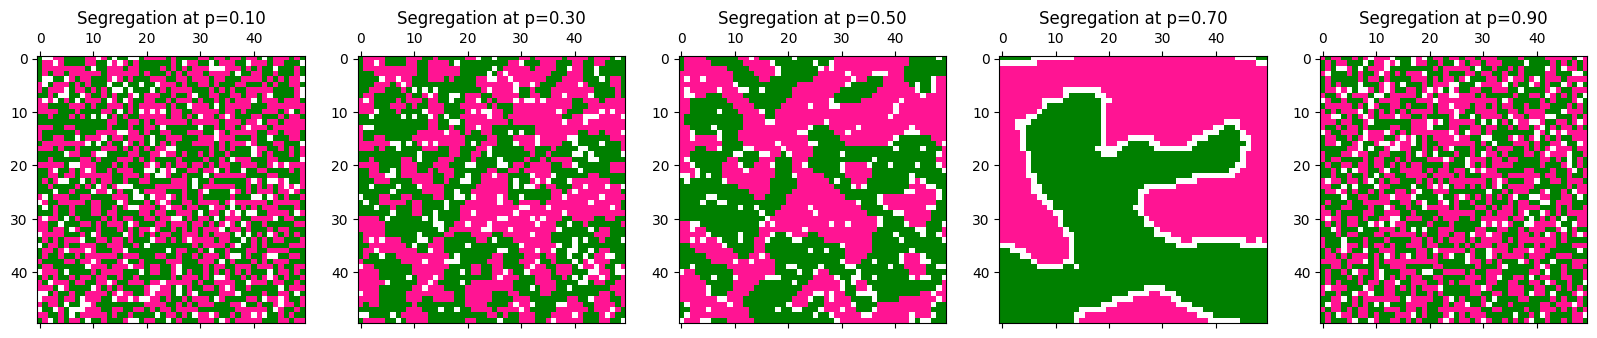

In [14]:
# probability_space
probability_space = [0.1, 0.3, 0.5, 0.7, 0.9] # Guide for the p formula
index = [0, 1, 2, 3, 4]
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

# Plot Loop
for i in index:
    p = 0.1 + 0.2*i
    result = equilibrate(city_map.copy(), p)
    ax[i].matshow(result, cmap=cmap2028)
    ax[i].set_title(f"Segregation at p={p:.2f}")
    # print(np.sum(color==0))
fig.savefig("Schelling.pdf")
# The Loop

As we can see, clustering peaks at $p = 0.70$, which is near the $p = 0.65$, put by the instructor, as he uses partitions instead from 0.20 to 0.8. The moral, however, is that, too little of individual tolerances does not motivate them to move and the inverse would mean insufficient space for the amount of dissatisfied tenants to move.